# Building basic recommender system
#### In this,we have focus on providing a basic recommendation system by suggesting items that are most similar to a particular item,in this case movies.keep in mind this is not a true robust recommendation system,to describe it more accurately,it just tells us that what movies are most similar to our movie choice.

# Import Libraries


In [ ]:
import numpy as np
import pandas as pd

# Getting rating datset and movie dataset

In [ ]:
data=pd.read_csv('/content/Ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [ ]:
data.shape

(372362, 4)

In [ ]:
movie_title=pd.read_csv('/content/Movies.csv')
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Merging this two dataset together


In [ ]:
data=pd.merge(data,movie_title,on='movieId')
data.head

<bound method NDFrame.head of         userId  movieId  rating     timestamp  \
0            1      296     5.0  1.147880e+09   
1            3      296     5.0  1.439474e+09   
2            4      296     4.0  1.573939e+09   
3            5      296     4.0  8.307862e+08   
4            7      296     4.0  8.354447e+08   
...        ...      ...     ...           ...   
372357    2556     7191     5.0  1.478884e+09   
372358    2556   126482     5.0  1.503036e+09   
372359    2556   161190     0.5  1.478887e+09   
372360    2556   161920     0.5  1.478887e+09   
372361    2559     6560     0.5  1.560906e+09   

                                                    title  \
0                                     Pulp Fiction (1994)   
1                                     Pulp Fiction (1994)   
2                                     Pulp Fiction (1994)   
3                                     Pulp Fiction (1994)   
4                                     Pulp Fiction (1994)   
...            

# Exploratory Data Analysis
#### Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Let's create a ratings dataframe with average rating and number of ratings.

In [ ]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
O Pátio das Cantigas (1942)                           5.0
Minbo: the Gentle Art of Japanese Extortion (1992)    5.0
Mower Minions (2016)                                  5.0
Mountain (2017)                                       5.0
Mother's Heart (1969)                                 5.0
Name: rating, dtype: float64

In [ ]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    1270
Forrest Gump (1994)                 1262
Pulp Fiction (1994)                 1250
Silence of the Lambs, The (1991)    1166
Matrix, The (1999)                  1140
Name: rating, dtype: int64

In [ ]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",4.00
$5 a Day (2008),3.75
$9.99 (2008),2.50
'71 (2014),2.75
'Hellboy': The Seeds of Creation (2004),3.25


#### Now set the number of ratings column:

In [ ]:
ratings['num of ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",4.00,5
$5 a Day (2008),3.75,2
$9.99 (2008),2.50,1
'71 (2014),2.75,6
'Hellboy': The Seeds of Creation (2004),3.25,2


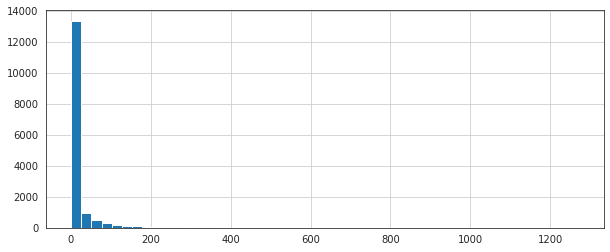

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)

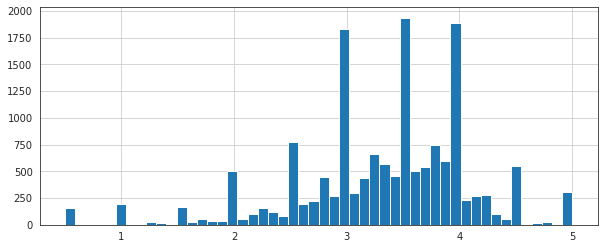

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

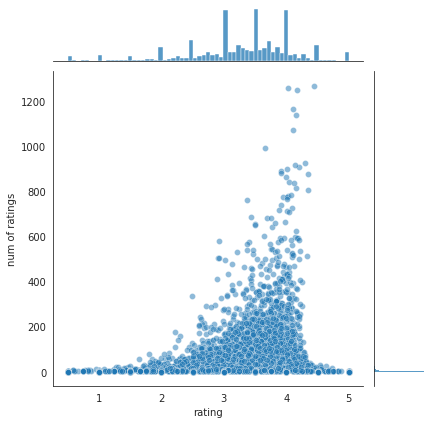

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

### With the reference of this plots,we have a general idea tof what the data looka like,
### Now let's move on to creating a simple recommendation system:

# Recommending Similar Movies
#### Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.


In [ ]:
moviemat=data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head(10)

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),...,Šíleně smutná princezna (1968),В движении (2002),Кентервильское привидение (1970),Когда зажигаются ёлки (1950),Ландыш серебристый (2000),Начальник,Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Most rated movie:

In [ ]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
"Shawshank Redemption, The (1994)",4.436614,1270
Forrest Gump (1994),4.025357,1262
Pulp Fiction (1994),4.174000,1250
"Silence of the Lambs, The (1991)",4.113636,1166
"Matrix, The (1999)",4.158333,1140
Star Wars: Episode IV - A New Hope (1977),4.100746,1072
Jurassic Park (1993),3.653769,995
Schindler's List (1993),4.293326,929
Star Wars: Episode V - The Empire Strikes Back (1980),4.134678,917


 Let's choose two movies: Shawshank Redemption,The (1994) and Jurassic Park (1933).
And let's grab the user ratings for those two movies:

In [ ]:
shawshank_user_ratings = moviemat['Shawshank Redemption, The (1994)']
Jurassic_Park_user_ratings = moviemat['Jurassic Park (1993)']
shawshank_user_ratings.head()

userId
1    NaN
2    5.0
3    4.0
4    NaN
5    NaN
Name: Shawshank Redemption, The (1994), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [ ]:
similar_to_shawshank=moviemat.corrwith(shawshank_user_ratings)
similar_to_Jurassic_Park=moviemat.corrwith(Jurassic_Park_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [ ]:
corr_shawshank=pd.DataFrame(similar_to_shawshank,columns=['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,Correlation
title,
'71 (2014),0.714772
'Til There Was You (1997),-0.301511
"'burbs, The (1989)",0.136969
'night Mother (1986),0.667308
(500) Days of Summer (2009),0.131307


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense.
###### This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [ ]:
corr_shawshank.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
The Emperor's Club (2002),1.0
Investigation of a Citizen Above Suspicion (Indagine su un cittadino al di sopra di ogni sospetto) (1970),1.0
Julieta (2016),1.0
Tears Were Falling (1982),1.0
Being Flynn (2012),1.0
Alaska: Spirit of the Wild (1997),1.0
That Munchhausen (1979),1.0
The Adventures of Buratino (1959),1.0
The Adventures of Buratino (1975),1.0


In [ ]:
corr_shawshank=corr_shawshank.join(ratings['num of ratings'])
corr_shawshank.head()

,Correlation,num of ratings
title,,
'71 (2014),0.714772,6
'Til There Was You (1997),-0.301511,10
"'burbs, The (1989)",0.136969,53
'night Mother (1986),0.667308,4
(500) Days of Summer (2009),0.131307,157


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).
###### Now sort the values and notice how the titles make a lot more sense:

In [ ]:
corr_shawshank[corr_shawshank['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,1270
Intouchables (2011),0.670842,169
Ben-Hur (1959),0.575656,140
"King's Speech, The (2010)",0.567938,193
"American Werewolf in London, An (1981)",0.513079,102


Now same for movie Jurassic Park (1993)

In [ ]:
corr_Jurassic_Park=pd.DataFrame(similar_to_Jurassic_Park,columns=['Correlation'])
corr_Jurassic_Park.dropna(inplace=True)
corr_Jurassic_Park=corr_Jurassic_Park.join(ratings['num of ratings'])
corr_Jurassic_Park[corr_Jurassic_Park['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,995
Moon (2009),0.573323,155
Kingsman: The Secret Service (2015),0.572363,134
"Lost World: Jurassic Park, The (1997)",0.562161,227
Copycat (1995),0.542120,127
